# 图像算术运算 

# 加法 cv2.add()
两图片应具有相同的深度和类型，或者第二图像只是标量值


In [1]:
import cv2 as cv 
import numpy as np

x = np.uint8([250])
y = np.uint8([10])

print(x+y)  # 250+10 = 260 % 256 = 4
            # numpy中，相加后 %256
print(cv.add(x,y))      # 250+10 = 260 => 255
                        # 超过255的按255，没超过的不变
                      


[4]
[[255]]


In [7]:
import cv2 as cv 
import numpy as np

x = np.uint8([200])
y = np.uint8([300])

print(x+y)
print(cv.add(x,y))

[244]
[[244]]


## 练习 

In [8]:
import cv2 as cv

img = cv.imread('messi0.jpg')
print('img.shape=',img.shape)

imgleft = img[:,0:(img.shape[1]//2)]
print('imgleft.shape=',imgleft.shape)
imgright = img[:,(img.shape[1]//2):]
print('imgright.shape=',imgright.shape)

img1 = cv.add(imgright,imgleft)
print('left_add_right.shape',img1.shape)
img2 = cv.add(img,200)
print('img_add_200',img2)

cv.imshow('left_add_right',img1)
cv.imshow('img_add_200',img2)
cv.waitKey(0)&0xFF==ord('q')
cv.destroyAllWindows()

img.shape= (280, 450, 3)
imgleft.shape= (280, 225, 3)
imgright.shape= (280, 225, 3)
left_add_right.shape (280, 225, 3)
img_add_200 [[[237  40  48]
  [242  45  53]
  [243  49  56]
  ...
  [255  55  55]
  [253  53  53]
  [253  53  53]]

 [[240  43  51]
  [244  47  55]
  [246  52  59]
  ...
  [255  59  59]
  [255  57  59]
  [255  58  58]]

 [[241  46  55]
  [247  52  61]
  [252  57  66]
  ...
  [255  65  66]
  [255  63  67]
  [255  63  64]]

 ...

 [[252 137  93]
  [245 130  86]
  [240 125  81]
  ...
  [253 127  85]
  [255 130  90]
  [255 130  90]]

 [[255 140  97]
  [255 142  99]
  [251 133  90]
  ...
  [255 132  90]
  [255 137  97]
  [255 137  97]]

 [[252 134  91]
  [255 142  99]
  [249 131  88]
  ...
  [255 131  89]
  [252 125  85]
  [252 125  85]]]


## 图像融合
这也是图像加法，但是对图像赋予不同的权重，以使其具有融合或透明的感

### cv2.addWeighted()
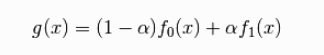

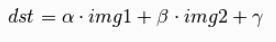

In [7]:
import cv2 as cv
import numpy as np

img1 = cv.imread('robot.jpg')
img2 = cv.imread('opencv-logo-white.png')
print(img1.shape,img2.shape)

dst = cv.addWeighted(img1,0.7,img2,0.3,0)
        #图片1，权重系数alpha，图片2，权重系数beta，偏差=0

cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

(222, 180, 3) (222, 180, 3)


### error
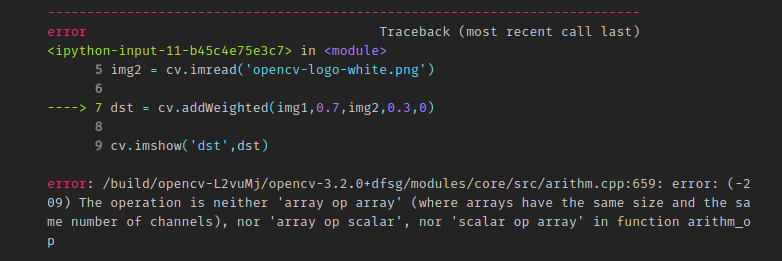
您需要确保temp_image和noise_image具有相同的大小和通道号。通常，当其中一个图像是BGR而另一个图像是GREY时，就会发生这种情况。

##  按位运算
提取更改图像特定区域

* bitwise_and是对二进制数据进行“与”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“与”操作，1&1=1，1&0=0，0&1=0，0&0=0

Cv2.bitwise_and (目标文件，源文件，mask)，将图片里的像素值按位与

* bitwise_or是对二进制数据进行“或”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“或”操作，1|1=1，1|0=0，0|1=0，0|0=0

* bitwise_xor是对二进制数据进行“异或”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“异或”操作，1^1=0,1^0=1,0^1=1,0^0=0

Cv2.bitwise_xor (目标文件，源文件，mask)，将图片里的像素值按位异或

* bitwise_not是对二进制数据进行“非”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“非”操作，~1=0，~0=1

Cv2.bitwise_not（图片文件），将图片里像素值按位反向。


### ret,mask = cv2.threshold(img2gray,175,255,cv2.THRESH_BINARY) 

原图像、阈值、填充色（最大值）、阈值类型

1. cv2.THRESH_BINARY   表示阈值的二值化操作，大于阈值使用maxval表示，小于阈值使用0表示

2. cv2.THRESH_BINARY_INV  表示阈值的二值化翻转操作，大于阈值的使用0表示，小于阈值的使用最大值表示

3. cv2.THRESH_TRUNC    表示进行截断操作，大于阈值的使用阈值表示，小于阈值的不变

4. cv2.THRESH_TOZERO   表示进行化零操作，大于阈值的不变，小于阈值的使用0表示

5. cv2.THRESH_TOZERO_INV  表示进行化零操作的翻转，大于阈值的使用0表示，小于阈值的不变



## Mask 掩膜 
* 数字图像处理中的掩膜的概念是借鉴于PCB制版的过程，在半导体制造中，许多芯片工艺步骤采用光刻技术，用于这些步骤的图形“底片”称为掩膜（也称作“掩模”），其作用是：在硅片上选定的区域中对一个不透明的图形模板遮盖，继而下面的腐蚀或扩散将只影响选定的区域以外的区域。
* 图像掩膜与其类似，用选定的图像、图形或物体，对处理的图像（全部或局部）进行遮挡，来控制图像处理的区域或处理过程。
* 数字图像处理中,掩模为二维矩阵数组,有时也用多值图像，图像掩模主要用于：

① 提取感兴趣区,用预先制作的感兴趣区掩模与待处理图像相乘,得到感兴趣区图像,感兴趣区内图像值保持不变,而区外图像值都为0。

② 屏蔽作用,用掩模对图像上某些区域作屏蔽,使其不参加处理或不参加处理参数的计算,或仅对屏蔽区作处理或统计。

③ 结构特征提取,用相似性变量或图像匹配方法检测和提取图像中与掩模相似的结构特征。

④ 特殊形状图像的制作。


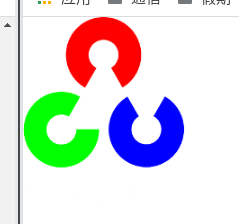


In [11]:
import cv2 
import numpy as np

#加载两个图片
img1 = cv2.imread('messi0.jpg')
img2 = cv2.imread('opencv-logo-white.png')
print(img1.shape,img2.shape)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
          # 转化灰度图
ret,mask = cv2.threshold(img2gray,175,255,cv2.THRESH_BINARY)
          # 阈值175，大于175用255表示，小于175用0表示
          # 隔离图像上像素边缘，扣除白色区域
mask_inv = cv2.bitwise_not(mask)
          # ‘非’操作，翻转选中图像创建mask

# Now black-out the area of logo in ROI
#取ROI中与mask中不为零的值对应的像素的值，其让值为0 。
         # ‘与’操作，融合mask区域与img1中区域（选出图标来，其余位置为0色素黑色）
img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
#取roi中与mask_inv中不为零的值对应的像素的值，其他值为0
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask=mask_inv)

# Put logo in ROI and modify the main image
        # 按位相加
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols] =dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(280, 450, 3) (222, 180, 3)


## error
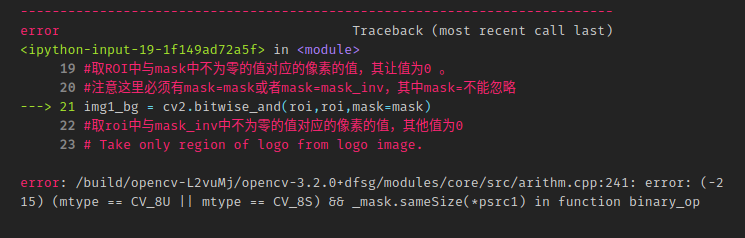

img2放入img1中

img1和2的shape信息发现，大图放入小图中，因此调换img1和2指代的图像

## 练习


img1: (1080, 1920, 3)
img2: (222, 180, 3)


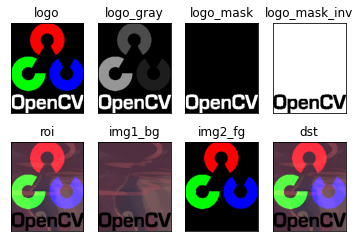

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('bizhi1.jpg')
img2 = cv2.imread('opencv-logo-white.png')

# img1 = cv2.resize(img1, (400, 400), interpolation=cv2.INTER_CUBIC)
# img2 = cv2.resize(img2, (400, 400), interpolation=cv2.INTER_CUBIC)

plt.imshow(img1)
print('img1:',img1.shape)
print('img2:',img2.shape)

#设置感兴趣的ROI
#logo放入左上角，提取原图中要放logo的ROI

rows,cols = img2.shape[:2]  
        #img.shape[:2] 切片操作，取彩色图片的高、宽,如果是【：3】取高宽通道
roi = img1[:rows,:cols]

#mask处理logo
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray,175,255,cv2.THRESH_BINARY) #阈值操作 ，找到白色区域
mask_inv = cv2.bitwise_not(mask)  #mask选区取反，找到logo区域

#图层融合
img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)  #img1中取出logo区域
img2_fg = cv2.bitwise_and(img2,img2,mask=mask_inv)  #img2 中取出logo位置

dst = cv2.add(img1_bg,img2_fg)  #融合区域
img1[:rows,:cols] = dst       #放回原图
img_new_add = img1.copy()

'''
# 显示图片，调用opencv展示
cv2.imshow('logo',img2)
cv2.imshow('logo_gray',img2gray)
cv2.imshow('logo_mask',mask)
cv2.imshow('logo_mask_inv',mask_inv)
cv2.imshow('roi',roi)
cv2.imshow('img1_bg',img1_bg)
cv2.imshow('img2_fg',img2_fg)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
# cv2与matplotlib的图像颜色模式转换，cv2是BGR格式，matplotlib是RGB格式
def img_convert(cv2_img):
    # 灰度图片直接返回
    if len(cv2_img.shape) == 2:
        return cv2_img
    # 3通道的BGR图片
    elif len(cv2_img.shape) == 3 and cv2_img.shape[2] == 3:
        b, g, r = cv2.split(cv2_img) #分离原图像通道
        return cv2.merge((r, g, b)) #合并新的图像通道
    # 4通道的BGR图片
    elif len(cv2_img.shape) == 3 and cv2_img.shape[2] == 4:
        b, g, r, a = cv2.split(cv2_img)
        return cv2.merge((r, g, b, a))
    # 未知图片格式
    else:
        return cv2_img

# 显示图片，调用matplotlib展示
titles = ['logo','logo_gray','logo_mask','logo_mask_inv','roi','img1_bg','img2_fg','dst']
imgs = [img2,img2gray,mask,mask_inv,roi,img1_bg,img2_fg,dst]
for i in range(len(imgs)):
    plt.subplot(2,4,i+1),plt.imshow(img_convert(imgs[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 显示并保存加logo的图片
cv2.imshow('img_new_add',img_new_add)
# cv2.imwrite('img_new_add.jpg',img_new_add)
cv2.waitKey(0)
cv2.destroyAllWindows()


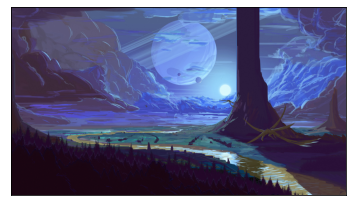

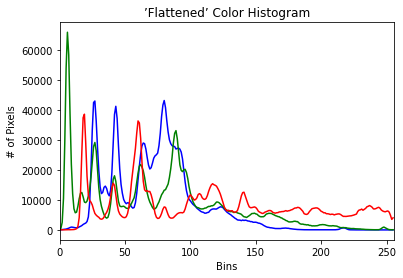

True

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# plt.imread('bizhi1.jpg')
# rgb = cv2.bgr[...,::-1]

img = cv2.imread('bizhi1.jpg')


plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()
# imggray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# imggray = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

############################ 颜色直方图
chans = cv2.split(img1)
colors = ('b', 'g', 'r')

plt.figure('颜色直方图')
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()  

# cv2.namedWindow('image',cv2.WINDOW_GUI_NORMAL)
# cv2.imshow('image',img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('bizhi2.jpg',img)

#  绩效评估和改进技术

0.185165728


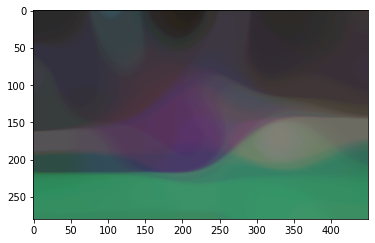

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('messi0.jpg')

e1 = cv2.getTickCount()
        # 返回当前时刻
        # 程序前时刻
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
            # 中值滤波，中值滤波取卷积核当中所覆盖像素中的中值作为锚点的像素值即可。
            # 此时实验中所用到的为3*3的卷积模板。即3行3列共9个元素的中值作为当前
            #  元素的像素值。
e2 = cv2.getTickCount()
        # 程序后时刻
t = (e2 - e1)/cv2.getTickFrequency()
        # 单位时钟频率
print(t)
plt.imshow(img1)
plt.show()
# Result I got is 0.521107655 seconds


## opencv 默认优化 
cv2.useOptimized() #查看优化器是否开启

cv2.setUseOptimized() #打开优化器

开启后大幅提高提高运算效率

中值滤波被SIMD优化

In [18]:
import cv2
import numpy as np

cv2.useOptimized()

True

In [24]:
import cv2
import numpy as np
img = cv2.imread('messi0.jpg')
%timeit res = cv2.medianBlur(img,49)

10 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
cv2.setUseOptimized(False)
# cv2.useOptimized()

In [30]:
cv2.useOptimized()

False

In [33]:
%timeit res = cv2.medianBlur(img,49)

29.1 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### timeit 模块
* class timeit.Timer(stmt='pass', setup='pass', timer=<timer function>)

Timer是测量小段代码执行速度的类。

stmt参数是要测试的代码语句（statment）；

setup参数是运行代码时需要的设置；

timer参数是一个定时器函数，与平台有关。
    
* imeit.Timer.timeit(number=1000000)

Timer类中测试语句执行速度的对象方法。number参数是测试代码时的测试次数，默认为1000000次。方法返回执行代码的耗时，一个float类型的秒数。

* %timeit




In [35]:
x = 5
%timeit y = x ** 2

140 ns ± 0.406 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [36]:
x = 5
%timeit y = x*x

22.8 ns ± 0.31 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [37]:
import numpy as np
z = np.uint8([5])
%timeit y = z * z

317 ns ± 4.35 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [38]:
%timeit y = np.square(z)

330 ns ± 5.19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
import cv2
import numpy as np
img = cv2.imread('messi0.jpg',0)

%timeit z = cv2.countNonZero(img)


57.3 µs ± 491 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [46]:
%timeit z = np.count_nonzero(img)

178 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 性能优化技术
有几种技术和编码方法可以充分利用Python和Numpy的性能。此处仅记录相关内容，并链接到重要资源。这里要注意的主要事情是，首先尝试以简单的方式实现该算法。工作正常后，对其进行概要分析，找到瓶颈并对其进行优化。

* 尽量避免在Python中使用循环，尤其是双/三重循环等。它们本来就很慢。

* 由于Numpy和OpenCV已针对向量运算进行了优化，因此将算法/代码向量化到最大程度。

* 利用缓存一致性。

* 除非需要，否则切勿制作数组的副本。尝试改用视图。阵列复制是一项昂贵的操作。
即使完成所有这些操作后，如果您的代码仍然很慢，或者不可避免地需要使用大循环，请使用Cython等其他库来使其更快。